In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dir_data = 'D:/Software/GitHub/document/3rd-ML100Days/example/Part01'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/Software/GitHub/document/3rd-ML100Days/example/Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [6]:
sub_df=app_train[app_train['DAYS_EMPLOYED']!=365243]

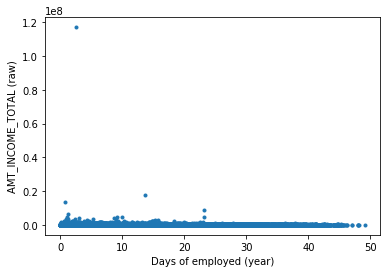

In [7]:
plt.plot(sub_df['DAYS_EMPLOYED']/(-365),sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()

In [10]:
corr=np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365),sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

Correlation: 0.0130


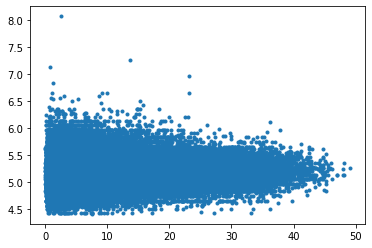

In [13]:
plt.plot(sub_df['DAYS_EMPLOYED']/(-365),np.log10(sub_df['AMT_INCOME_TOTAL']), '.')
plt.show()

In [15]:
corr=np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365),np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

Correlation: 0.0380


In [16]:
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                 -0.044932
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
HOUR_APPR_PROCESS_START       -0.024166
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942


In [27]:
(app_train.corr()['TARGET']).sort_values(ascending=False).head(15)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [28]:
(app_train.corr()['TARGET']).sort_values(ascending=False).tail(15)

LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

Correlation: nan


D:\Software\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Software\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


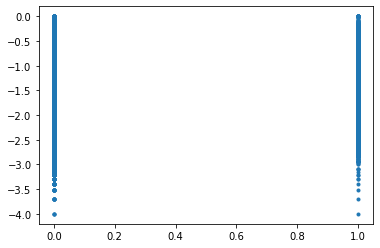

In [55]:
corr=np.corrcoef(app_train['TARGET'],app_train['LIVINGAREA_MEDI'])
print("Correlation: %.4f" % (corr[0][1]))

plt.plot(app_train['TARGET'],np.log10(app_train['LIVINGAREA_MEDI']),'.')
